# Sampling - Deep learning course MIT slides

http://courses.d2l.ai/berkeley-stat-157/units/probability.html

In [15]:
from __future__ import print_function

%matplotlib inline
from matplotlib import pyplot as plt
import mxnet as mx
from mxnet import nd
import numpy as np
import math

In [16]:
import random
for i in range(10):
    print(random.random())

0.6480275560279746
0.43469244009233343
0.8109626705051888
0.680402190919413
0.13657764225510416
0.5512376344152681
0.09741815901033135
0.24335691555674188
0.9094101117570965
0.3649166125225054


## Uniform Distribution

In [17]:
for i in range(10):
    print(random.randint(1, 100))

27
81
45
14
42
95
49
78
39
100


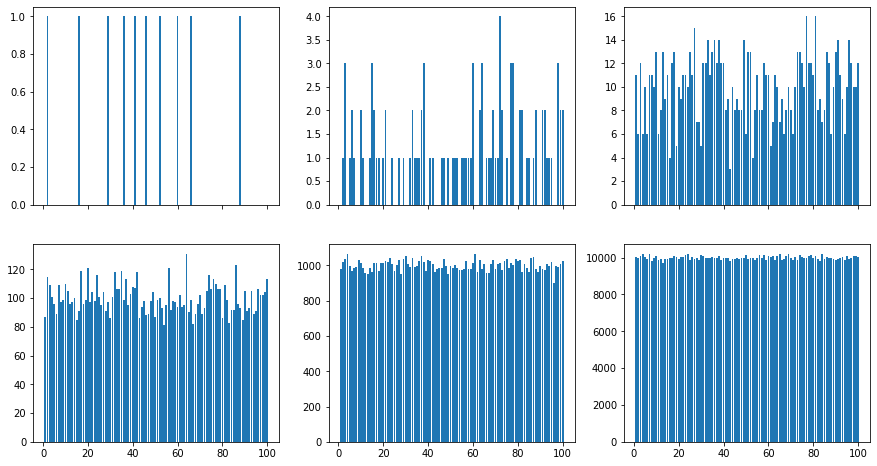

In [18]:
counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes = axes.reshape(6)

for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1, 101), counts)
plt.show()

## Categorical Distribution

In [19]:
# number of samples
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)
# count number of occurrences and divide by the number of total draws
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x


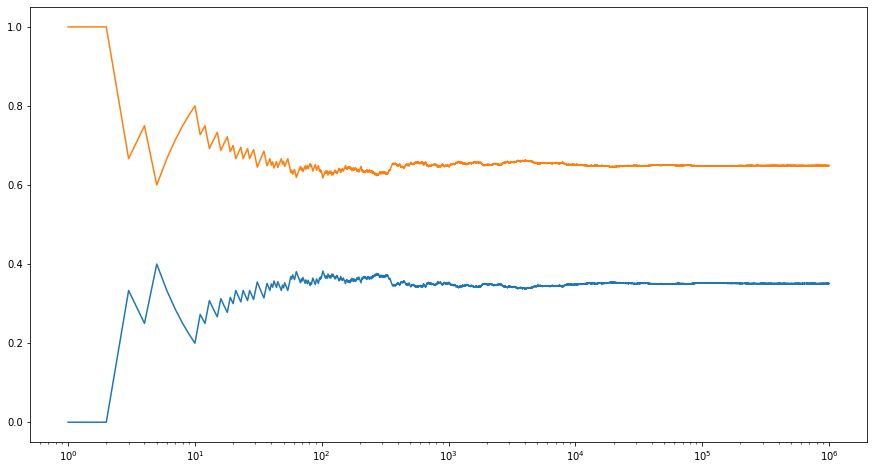

In [20]:
plt.figure(figsize=(15, 8))
plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.show()

## Normal Distribution

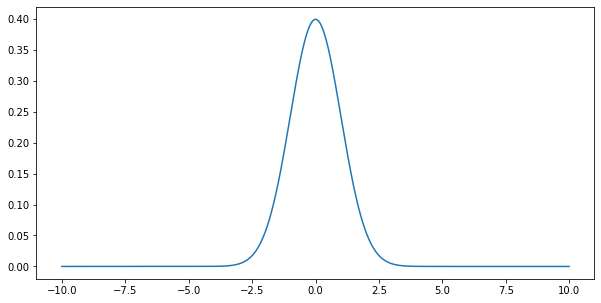

In [21]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.figure(figsize=(10, 5))
plt.plot(x, p)
plt.show()

## Central Limit Theorem in Action

In [22]:
# generate 10 random sequences of 10,000 uniformly distributed random variables
tmp = np.random.uniform(size=(10000,10))
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
mean = 1 * 0.5 + 2 * 0.2
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance {}'.format(mean, variance))
# cumulative sum and normalization
y = np.arange(1,10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

mean 0.9, variance 0.49


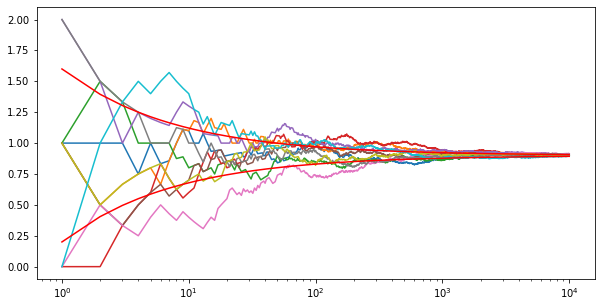

In [10]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.semilogx(y,z[:,i])

plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.show()